**Step 1: Big Picture and Setup**

In [1]:
# general imports here
import pandas as pd
import numpy as np
import os
import urllib.request

**Step 2: Get the data**

In [2]:
# Create a directory to store data
data_path = "datasets/dropout-tables"
os.makedirs(data_path, exist_ok=True)

# File URLs
files = {
    "dropout_rates.csv": "https://raw.githubusercontent.com/Midnightx689/Dropout-Tables/main/cohort_graduation_and_dropout_rates.csv",
    "absenteeism.xlsx": "https://github.com/Midnightx689/Dropout-Tables/raw/main/chronic-absenteeism-school-2022.xlsx",
    "behavior.xlsx": "https://github.com/Midnightx689/Dropout-Tables/raw/main/student_behavior.xlsx",
}

# Download files
for filename, url in files.items():
    file_path = os.path.join(data_path, filename)
    urllib.request.urlretrieve(url, file_path)
    print(f"Downloaded {filename} to {file_path}")

Downloaded dropout_rates.csv to datasets/dropout-tables/dropout_rates.csv
Downloaded absenteeism.xlsx to datasets/dropout-tables/absenteeism.xlsx
Downloaded behavior.xlsx to datasets/dropout-tables/behavior.xlsx


In [3]:
def load_dropout_data(data_path=data_path):
    csv_path = os.path.join(data_path, "dropout_rates.csv")
    return pd.read_csv(csv_path)

dropout_rates = load_dropout_data()
dropout_rates.head()

,Cohort Year,Level,Division Number,Division Name,School Number,School Name,Type of Graduation Rate,Rate Type,Graduation Rate,Students in Cohort,...,Other Diplomas,Applied Studies,GED,ISAEP,Certificate of Completion,Completion Rate,Dropout Rate,Dropouts,Still Enrolled,Long-Term Absence
0,2023,School,1.0,Accomack County,540.0,Arcadia High,On-Time Graduation Rate,4 yr rate,83.71%,178,...,0,<,2,0,0,84.83%,3.93%,7,4,16
1,2023,School,1.0,Accomack County,580.0,Chincoteague High,On-Time Graduation Rate,4 yr rate,91.67%,36,...,0,0,0,0,0,91.67%,5.56%,2,0,1
2,2023,School,1.0,Accomack County,70.0,Nandua High,On-Time Graduation Rate,4 yr rate,91.72%,157,...,0,<,0,0,0,91.72%,7.01%,11,1,1
3,2023,School,1.0,Accomack County,530.0,Tangier Combined,On-Time Graduation Rate,4 yr rate,<,<,...,<,<,<,<,<,<,<,<,<,<
4,2023,School,2.0,Albemarle County,880.0,Albemarle High,On-Time Graduation Rate,4 yr rate,92.02%,476,...,0,10,1,2,0,92.65%,5.88%,28,7,0


In [4]:
dropout_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cohort Year                335 non-null    int64  
 1   Level                      335 non-null    object 
 2   Division Number            334 non-null    float64
 3   Division Name              334 non-null    object 
 4   School Number              334 non-null    float64
 5   School Name                334 non-null    object 
 6   Type of Graduation Rate    335 non-null    object 
 7   Rate Type                  335 non-null    object 
 8   Graduation Rate            335 non-null    object 
 9   Students in Cohort         335 non-null    object 
 10  Total Graduates            335 non-null    object 
 11  Advanced Studies           335 non-null    object 
 12  IB                         335 non-null    object 
 13  Standard                   335 non-null    object 

In [5]:
missing = dropout_rates.isnull().sum() # check missing values
missing = missing[missing > 0]
print(missing)

Division Number    1
Division Name      1
School Number      1
School Name        1
dtype: int64


In [6]:
dropout_rates.describe()

,Cohort Year,Division Number,School Number
count,335.0,334.000000,334.000000
mean,2023.0,68.260479,590.155689
std,0.0,41.963817,621.557638
min,2023.0,1.000000,10.000000
25%,2023.0,29.000000,142.750000
50%,2023.0,68.500000,460.000000
75%,2023.0,101.750000,827.750000
max,2023.0,207.000000,5130.000000


In [7]:
import pandas as pd
import numpy as np

# Load your dataset (assuming it's a DataFrame named 'dropout_rates')

# Step 1: Strip whitespace and replace problematic values
dropout_rates = dropout_rates.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)
dropout_rates.replace({"<": np.nan, "N/A": np.nan, "nan": np.nan, "": np.nan}, inplace=True)

# Step 2: Convert percentage columns (remove % and convert to float)
percent_columns = ["Graduation Rate", "Completion Rate", "Dropout Rate"]  # Add relevant column names
for col in percent_columns:
    dropout_rates[col] = dropout_rates[col].astype(str).str.rstrip("%").astype(float)

# Step 3: Convert numeric columns
numeric_columns = ["Students in Cohort", "Other Diplomas", "Applied Studies", "GED",
                   "ISAEP", "Certificate of Completion", "Dropouts", "Still Enrolled", "Long-Term Absence",
                   "Total Graduates", "Advanced Studies", "Standard"]
dropout_rates[numeric_columns] = dropout_rates[numeric_columns].apply(pd.to_numeric, errors="coerce")

# Step 4: Handle missing values (example: fill NaNs with 0)
# dropout_rates.fillna(0, inplace=True)

# Display cleaned data
print(dropout_rates.head())


   Cohort Year   Level  Division Number     Division Name  School Number  \
0         2023  School              1.0   Accomack County          540.0   
1         2023  School              1.0   Accomack County          580.0   
2         2023  School              1.0   Accomack County           70.0   
3         2023  School              1.0   Accomack County          530.0   
4         2023  School              2.0  Albemarle County          880.0   

         School Name  Type of Graduation Rate  Rate Type  Graduation Rate  \
0       Arcadia High  On-Time Graduation Rate  4 yr rate            83.71   
1  Chincoteague High  On-Time Graduation Rate  4 yr rate            91.67   
2        Nandua High  On-Time Graduation Rate  4 yr rate            91.72   
3   Tangier Combined  On-Time Graduation Rate  4 yr rate              NaN   
4     Albemarle High  On-Time Graduation Rate  4 yr rate            92.02   

   Students in Cohort  ...  Other Diplomas  Applied Studies  GED  ISAEP  \
0    

<ipython-input-7-9604afa5eb30>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dropout_rates = dropout_rates.applymap(lambda x: str(x).strip() if isinstance(x, str) else x)


In [8]:
dropout_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cohort Year                335 non-null    int64  
 1   Level                      335 non-null    object 
 2   Division Number            334 non-null    float64
 3   Division Name              334 non-null    object 
 4   School Number              334 non-null    float64
 5   School Name                334 non-null    object 
 6   Type of Graduation Rate    335 non-null    object 
 7   Rate Type                  335 non-null    object 
 8   Graduation Rate            332 non-null    float64
 9   Students in Cohort         330 non-null    float64
 10  Total Graduates            331 non-null    float64
 11  Advanced Studies           331 non-null    float64
 12  IB                         332 non-null    object 
 13  Standard                   331 non-null    float64

In [9]:
dropout_rates['Dropout Rate']

,Dropout Rate
0,3.93
1,5.56
2,7.01
3,NaN
4,5.88
...,...
330,0.66
331,0.00
332,1.52
333,0.00


In [10]:
num_missing_dropout_rates = dropout_rates['Dropout Rate'].isnull().sum()
print(f"Number of rows with missing Dropout Rate: {num_missing_dropout_rates}")

Number of rows with missing Dropout Rate: 3


In [11]:
mean_dropout_rate = dropout_rates['Dropout Rate'].mean()
median_dropout_rate = dropout_rates['Dropout Rate'].median()
mode_dropout_rate = dropout_rates['Dropout Rate'].mode()
std_dropout_rate = dropout_rates['Dropout Rate'].std()

print(f"Mean Dropout Rate: {mean_dropout_rate}")
print(f"Median Dropout Rate: {median_dropout_rate}")
print(f"Mode Dropout Rate: {mode_dropout_rate}")
print(f"Standard Deviation of Dropout Rate: {std_dropout_rate}")

Mean Dropout Rate: 5.69421686746988
Median Dropout Rate: 4.109999999999999
Mode Dropout Rate: 0    0.0
Name: Dropout Rate, dtype: float64
Standard Deviation of Dropout Rate: 7.95661249945111


**Make a Pipeline:**

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.base import BaseEstimator, TransformerMixin

# Assuming 'dropout_rates' is your DataFrame
# Select features (X) and target (y)
X = dropout_rates[["Cohort Year", "Level", "Division Number", "Division Name", "Type of Graduation Rate",
     "Rate Type", "Graduation Rate", "Students in Cohort", "Total Graduates", "Advanced Studies",
     "IB", "Standard", "Other Diplomas", "Applied Studies", "GED", "ISAEP",
     "Certificate of Completion", "Completion Rate", "Still Enrolled", "Long-Term Absence"]]

# Assuming 'dropout_rates' is your DataFrame
threshold = 4.109999999999999
# print(f"Threshold at {desired_percentile}th percentile: {threshold}")
y = (dropout_rates['Dropout Rate'] >= threshold).astype(int)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_features = ["Cohort Year", "Division Number", "Graduation Rate", "Students in Cohort",
                    "Total Graduates", "Advanced Studies", "Standard", "Other Diplomas",
                    "Applied Studies", "GED", "ISAEP", "Certificate of Completion",
                    "Completion Rate", "Still Enrolled", "Long-Term Absence"]

categorical_features = ["Level", "Division Name", "Type of Graduation Rate", "Rate Type"]



numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

In [13]:
# replace the NaN values with the mean of the column
imputer = SimpleImputer(strategy='mean')
dropout_rates['Dropout Rate'] = imputer.fit_transform(dropout_rates[['Dropout Rate']])

In [14]:
num_missing_dropout_rates = dropout_rates['Dropout Rate'].isnull().sum()
print(f"Number of rows with missing Dropout Rate: {num_missing_dropout_rates}")

Number of rows with missing Dropout Rate: 0


In [15]:
X_train_processed = pipeline.fit_transform(X_train)
X_val_processed = pipeline.transform(X_val)
X_test_processed = pipeline.transform(X_test)

**Step 3: Train a Neural Network**

In [16]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_processed, y_train, epochs=50, batch_size=32, validation_data=(X_val_processed, y_val))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.6395 - loss: 0.6574 - val_accuracy: 0.7800 - val_loss: 0.6137
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7770 - loss: 0.5906 - val_accuracy: 0.7600 - val_loss: 0.5644
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8073 - loss: 0.5423 - val_accuracy: 0.7800 - val_loss: 0.5304
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8356 - loss: 0.5172 - val_accuracy: 0.7600 - val_loss: 0.5022
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8833 - loss: 0.4597 - val_accuracy: 0.7600 - val_loss: 0.4782
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8278 - loss: 0.4537 - val_accuracy: 0.7600 - val_loss: 0.4625
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8684 - loss: 0.4097 - val_accuracy: 0.7600 - val_loss: 0.4488
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8835 - loss: 0.3850 - val_accuracy: 0.7600 - val_loss: 0.4364


In [17]:
loss, accuracy = model.evaluate(X_test_processed, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8903 - loss: 0.2564
Test Loss: 0.26992785930633545
Test Accuracy: 0.8823529481887817


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test_processed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Accuracy: 0.8823529411764706
Precision: 0.896551724137931
Recall: 0.896551724137931
F1 Score: 0.896551724137931


In [19]:
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score  # Import accuracy_score

# Convert the sparse matrix to a dense NumPy array
X_test_dense = X_test_processed.toarray()

# Define a scoring function using accuracy_score
def scoring_fn(estimator, X, y):
    y_pred = estimator.predict(X)
    y_pred_binary = (y_pred > 0.5).astype(int)
    return accuracy_score(y, y_pred_binary)

# Calculate permutation feature importance using the scoring function
result = permutation_importance(model, X_test_dense, y_test, scoring=scoring_fn, n_repeats=10, random_state=42)

# Get feature importances and their indices
importances = result.importances_mean
feature_indices = np.argsort(importances)[::-1]  # Sort in descending order

# Print feature ranking
print("Feature ranking:")
for i in feature_indices:
    # Map the index back to the original feature name (if using ColumnTransformer)
    # Assuming 'preprocessor' is your ColumnTransformer object
    feature_name = preprocessor.get_feature_names_out()[i]  # Adjust if needed

    print(f"  {feature_name}: {importances[i]:.3f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━

In [20]:
from tensorflow.keras.layers import Input
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Input(shape=(X_train_processed.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_processed, y_train, epochs=20, batch_size=8, validation_data=(X_val_processed, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4927 - loss: 0.7385 - val_accuracy: 0.5800 - val_loss: 0.6639
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5570 - loss: 0.6713 - val_accuracy: 0.6400 - val_loss: 0.6219
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6760 - loss: 0.6186 - val_accuracy: 0.6600 - val_loss: 0.5868
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7234 - loss: 0.5687 - val_accuracy: 0.7200 - val_loss: 0.5546
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7818 - loss: 0.5046 - val_accuracy: 0.7400 - val_loss: 0.5270
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8719 - loss: 0.4786 - val_accuracy: 0.7800 - val_loss: 0.5079
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8482 - loss: 0.4766 - val_accuracy: 0.7800 - val_loss: 0.4912
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8700 - loss: 0.4063 - val_accuracy: 0.7600 - val_los

In [21]:
loss, accuracy = model.evaluate(X_test_processed, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8903 - loss: 0.3240
Test Loss: 0.33263298869132996
Test Accuracy: 0.8823529481887817


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test_processed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Accuracy: 0.8823529411764706
Precision: 0.8709677419354839
Recall: 0.9310344827586207
F1 Score: 0.9


Model Evaluation Metrics:
Accuracy: 0.8823529411764706
Precision: 0.8709677419354839
Recall: 0.9310344827586207
F1 Score: 0.9


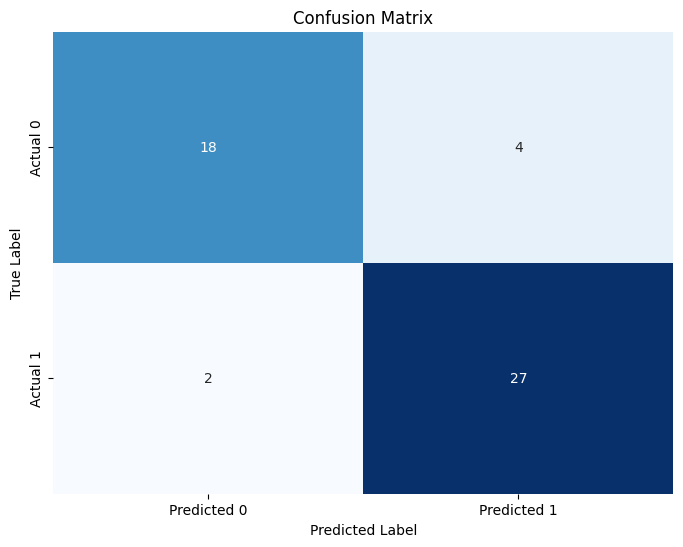

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_test (true labels) and y_pred_binary (predicted labels)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()